# **Plant Disease**

In [2]:
# importing libraries
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as Imgen ,image_dataset_from_directory
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,GlobalAveragePooling2D,BatchNormalization
from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

from sklearn.metrics import confusion_matrix,classification_report
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
from keras.preprocessing.image import image_dataset_from_directory

In [4]:

# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((32, 32))

# Path Cwd
cwd_dir = os.getcwd()

print(cwd_dir)
# Path to the dataset folder
root_dir = cwd_dir+'/Dataset'

train_dir = os.path.join(root_dir, 'train').replace("\\", '/')
val_dir = os.path.join(root_dir, 'val').replace("\\", '/')
test_dir = os.path.join(root_dir, 'test').replace("\\", '/')
print(test_dir)

BATCH_SIZE = 32
CHANNELS=3
EPOCHS=5

c:\Users\PC\Documents\GitHub\Plant-Leaf-Disease-Classification
c:/Users/PC/Documents/GitHub/Plant-Leaf-Disease-Classification/Dataset/test


### **Data Generation**

In [5]:
traingen = Imgen(preprocessing_function=preprocess_input)
valgen = Imgen(preprocessing_function=preprocess_input)
testgen = Imgen(preprocessing_function=preprocess_input)

In [6]:
trainds = traingen.flow_from_directory(train_dir,
                                      target_size=DEFAULT_IMAGE_SIZE,
                                       class_mode="categorical",
                                       seed=123,
                                       batch_size=32,
                                       subset="training"
                                      )

testds = testgen.flow_from_directory(val_dir,target_size=DEFAULT_IMAGE_SIZE,
                                    class_mode="categorical",
                                    seed=123,
                                    batch_size=32,
                                    shuffle=False)

valds = valgen.flow_from_directory(test_dir,
                                      target_size=DEFAULT_IMAGE_SIZE,
                                       class_mode="categorical",
                                       seed=123,
                                       batch_size=32
                                       
                                      )

Found 7947 images belonging to 19 classes.
Found 5329 images belonging to 19 classes.
Found 883 images belonging to 19 classes.


**Classes**

In [7]:
c = trainds.class_indices
classes = list(c.keys())
classes

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

<AxesSubplot:ylabel='count'>

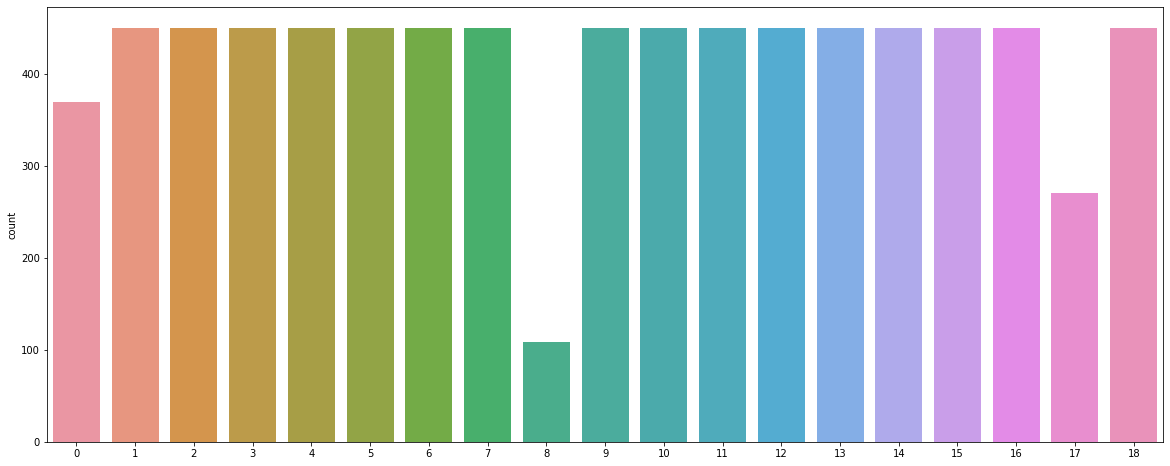

In [8]:
plt.figure(figsize=[20,8])
sns.countplot(x=trainds.classes)

**One Batch**

In [9]:
x,y = next(trainds)

# function to plot images
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

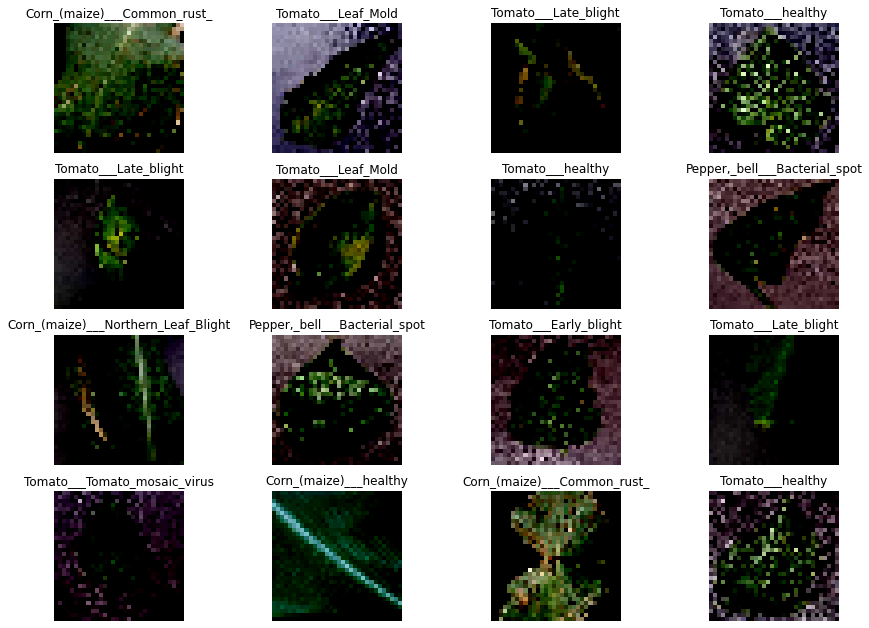

In [10]:
plotImages(x,y)

## **Model**

In [11]:
WIDTH = DEFAULT_IMAGE_SIZE[0]
HEIGHT = DEFAULT_IMAGE_SIZE[1]
DEPTH = 3
inputShape = (HEIGHT, WIDTH, DEPTH)

In [12]:

## Tetsing layer

model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=inputShape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

**Compile**

In [14]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 20 #100
opt_funct = Adam(learning_rate=lr)

In [15]:
#Compilation of the model
model.compile(loss='binary_crossentropy', optimizer=opt_funct, metrics=['accuracy'])

**Train**

In [16]:
hist = model.fit(trainds,batch_size = 32,epochs=max_epochs,validation_data=valds)

Epoch 1/20
249/249 [==============================] - 43s 167ms/step - loss: 0.1679 - accuracy: 0.3396 - val_loss: 0.0976 - val_accuracy: 0.6263
Epoch 2/20
249/249 [==============================] - 36s 145ms/step - loss: 0.0942 - accuracy: 0.6451 - val_loss: 0.0689 - val_accuracy: 0.7497
Epoch 3/20
249/249 [==============================] - 35s 141ms/step - loss: 0.0708 - accuracy: 0.7476 - val_loss: 0.0530 - val_accuracy: 0.8120
Epoch 4/20
249/249 [==============================] - 35s 142ms/step - loss: 0.0583 - accuracy: 0.7958 - val_loss: 0.0437 - val_accuracy: 0.8573
Epoch 5/20
249/249 [==============================] - 34s 136ms/step - loss: 0.0485 - accuracy: 0.8391 - val_loss: 0.0384 - val_accuracy: 0.8754
Epoch 6/20
249/249 [==============================] - 34s 137ms/step - loss: 0.0430 - accuracy: 0.8599 - val_loss: 0.0351 - val_accuracy: 0.8890
Epoch 7/20
249/249 [==============================] - 34s 137ms/step - loss: 0.0361 - accuracy: 0.8886 - val_loss: 0.0314 - val_ac

**Test**

In [17]:
model.evaluate(testds)

167/167 [==============================] - 13s 78ms/step - loss: 0.0298 - accuracy: 0.9180


[0.029773371294140816, 0.9179958701133728]

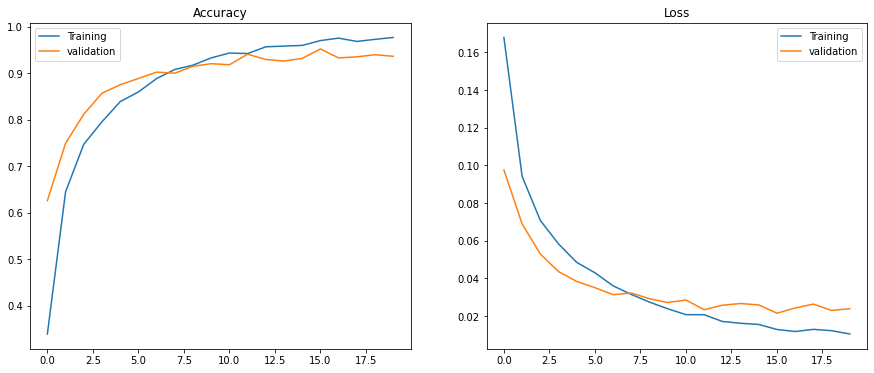

In [18]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

## **Predictions.**

In [19]:
c = trainds.class_indices
classes = list(c.keys())
c

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Pepper,_bell___Bacterial_spot': 4,
 'Pepper,_bell___healthy': 5,
 'Potato___Early_blight': 6,
 'Potato___Late_blight': 7,
 'Potato___healthy': 8,
 'Tomato___Bacterial_spot': 9,
 'Tomato___Early_blight': 10,
 'Tomato___Late_blight': 11,
 'Tomato___Leaf_Mold': 12,
 'Tomato___Septoria_leaf_spot': 13,
 'Tomato___Spider_mites Two-spotted_spider_mite': 14,
 'Tomato___Target_Spot': 15,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 16,
 'Tomato___Tomato_mosaic_virus': 17,
 'Tomato___healthy': 18}

In [20]:
pred = model.predict(testds)

In [21]:
pred = [np.argmax(i) for i in pred]

In [22]:
y_test = testds.classes
print(y_test)

[ 0  0  0 ... 18 18 18]


**Classification Report**

In [26]:
print(classification_report(pred,y_test))
report = classification_report(pred,y_test)
df = pandas.DataFrame(report).transpose()
df.to_csv('classification_report.csv', index = False)


              precision    recall  f1-score   support

           0       0.88      0.83      0.85       110
           1       1.00      0.97      0.98       245
           2       0.91      0.92      0.92       196
           3       1.00      0.96      0.98       242
           4       0.91      0.81      0.86       223
           5       0.98      0.92      0.95       312
           6       0.99      0.78      0.87       253
           7       0.94      0.79      0.86       238
           8       0.87      0.75      0.81        36
           9       0.92      0.94      0.93       418
          10       0.84      0.85      0.85       197
          11       0.73      0.95      0.82       293
          12       0.94      0.89      0.91       202
          13       0.76      0.96      0.85       280
          14       0.93      0.93      0.93       337
          15       0.94      0.87      0.90       301
          16       0.95      0.98      0.96      1041
          17       1.00    

ValueError: DataFrame constructor not properly called!

**Confusion Matrix**

<AxesSubplot:>

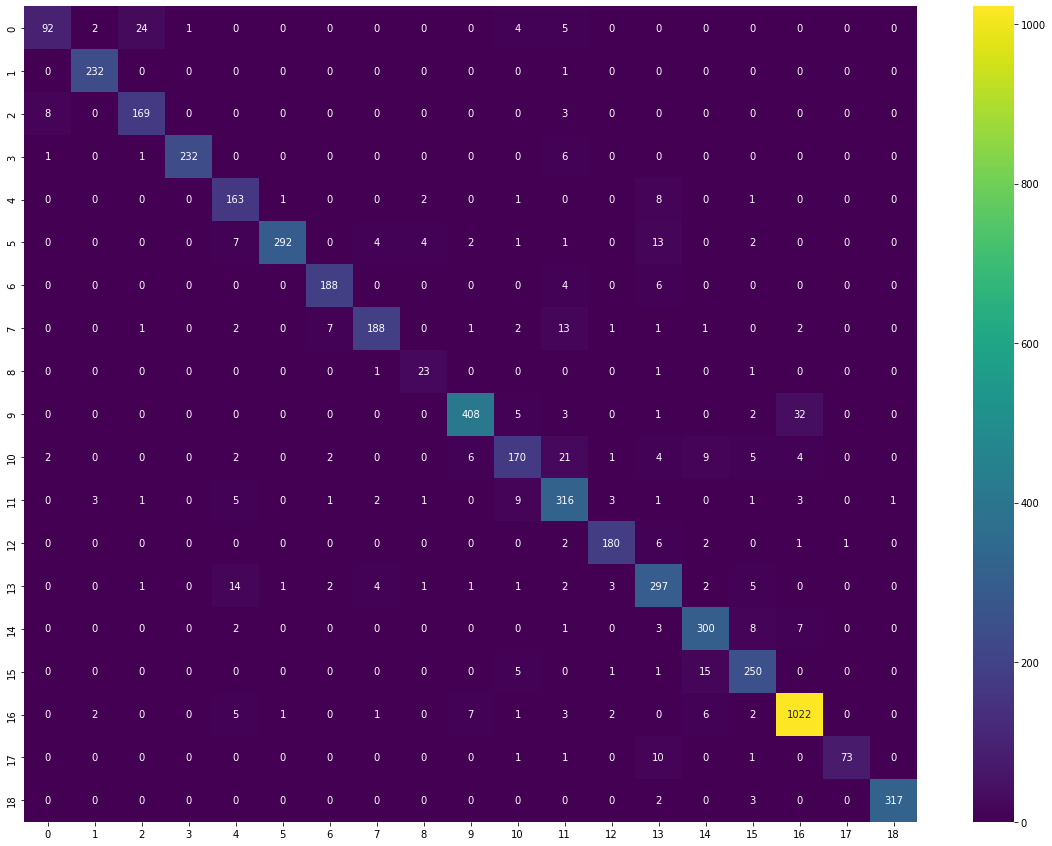

In [56]:
plt.figure(figsize=[20,15])
sns.heatmap(confusion_matrix(pred,y_test),annot = True, fmt = "d", cmap = "viridis")